## Midterm Project Using Kaggle Datasets

dataset url : https://www.kaggle.com/datasets/samuelcortinhas/muffin-vs-chihuahua-image-classification?select=test

### Task : Using Image Classification for Distinguishing Muffin and Chihuahua

* 치와와와 머핀의 이미지를 정확하게 분류하기

<img src="https://i.postimg.cc/2SXNWP7f/muffin-meme2.jpg"  width="50%" height="50%"></img>


---

### 데이터셋 설명
* 모든 데이터 셋은 muffin과 chihuahua 단어에 대해 구글 이미지 결과값을 스크랩한 바이너리 이미지 파일로 구성되어있습니다.

* 선택한 데이터 셋은 아래와 같은 두 가지의 데이터 셋으로 나뉘어있습니다.
    * train
    * test
    * 각각의 데이터 셋 내부에는 두 가지의 레이블이 존재합니다.
        * muffin
        * chihuahua
        
* 모델 학습 시 데이터 셋은 다음과 같이 분류하여 사용하였습니다.
    * train data : 학습 데이터 (4733장의 이미지)
    * validation data : 모델 성능 검증을 위한 데이터 (500장의 이미지)
    * train data : 모델 학습 종료 후 모델을 테스트하기 위한 데이터 (684장의 이미지)


### Dataset Description
* All datasets consist of binary image files obtained by scraping Google Image search results for the words "muffin" and "chihuahua."

* The selected dataset is divided into two main datasets:
    * Train
    * Test
    * Each dataset contains two labels:
        * Muffin
        * Chihuahua
* During model training, the datasets were categorized as follows:
    * Train Data: Used for model training (4733 images)
    * Validation Data: Used for model performance validation (500 images)
    * Test Data: Used to test the model after training completion (684 images)

---

### 모델 학습 및 테스트 환경

* Window 10 Home
* NVIDIA GeForce RTX 3060 Laptop
* python 3.11.5
* pytorch 2.1.0

### 이미지 분류를 위해 선택한 지도학습 알고리즘

CNN (Convolutional Neural Network)
  * 필터를 통한 합성곱 연산으로 이미지 분류에 특화된 알고리즘
  * Pretrained 된 VGG16 모델을 가져와 최종 layer만 수정하여 학습

### Model Training and Testing Environment

* Window 10 Home
* NVIDIA GeForce RTX 3060 Laptop
* python 3.11.5
* pytorch 2.1.0

### Supervised Learning Algorithms Chosen for Image Classification

CNN (Convolutional Neural Network)
  * It is an algorithm which specialized in image classification with convolution operation through filter
  * Get a pretrained VGG16 model and modify only the final layer to learn

---

### CNN

#### 필요한 라이브러리 import - Importing Essential Libraries and Modules

In [1]:
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

from PIL import Image
import numpy as np

#### 학습 관련 변수 사전 설정 - Setting up training-related variables

In [2]:
lr = 0.001 # 학습률
batch_size = 16 # 한번에 얼만큼의 이미지를 학습시킬지
epochs = 10 # 데이터를 몇 번 반복하여 학습시킬지

#### 데이터 전처리 - Data PreProcessing

In [3]:
# 주어진 이미지 데이터를 일괄적으로 300 * 300 의 크기로 정규화하고, 
# 텐서로 변환되도록 데이터 전처리 파이프라인을 정의합니다.
train_trans = transforms.Compose([transforms.Resize((277, 277)),
                                  transforms.RandomVerticalFlip(), # 변형 추가
                                  transforms.RandomHorizontalFlip(), # 변형 추가
                                  transforms.ToTensor(),
                                  transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                           ])
test_trans = transforms.Compose([transforms.Resize((277, 277)),
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
                           ])

# 각 이미지 폴더에 위치한 이미지들을 정규화한 데이터셋으로 가져옵니다.
train_data = torchvision.datasets.ImageFolder(root= 'content/train',
                                                     transform = train_trans)

test_dataset = torchvision.datasets.ImageFolder(root= 'content/test',
                                                     transform = test_trans)

# train 데이터를 train / validation 데이터가 랜덤한 두 가지 값으로 나뉘도록 합니다.
val_size = 500
test_size = len(test_dataset) - val_size
test_data,val_data = random_split(test_dataset,[test_size,val_size])
print(f"Length of Train Data : {len(train_data)}")
print(f"Length of Validation Data : {len(val_data)}")
print(f"Length of Test Data : {len(test_data)}")

# 각 학습용 데이터들을 사전 정의한 batch_size 단위로 처리할 수 있도록 데이터 로드를 생성합니다.
train_loader = DataLoader(dataset=train_data,
                          batch_size=batch_size,
                          shuffle=True)
val_loader = DataLoader(dataset=val_data,
                          batch_size=batch_size,
                          shuffle=True)

test_loader = DataLoader(dataset=test_data,
                         batch_size=batch_size,
                         shuffle=False)

print(len(train_data), len(train_loader))
print(len(val_data), len(val_loader))
print(len(test_data), len(test_loader))

Length of Train Data : 4733
Length of Validation Data : 500
Length of Test Data : 684
4733 296
500 32
684 43


#### Pretrained CNN 모델 가져오기 - Load Pretrained CNN Model

In [4]:
model = torchvision.models.vgg16(pretrained=True).cuda()

model.classifier[-1] = nn.Linear(in_features=4096, out_features=2, bias=True).cuda()

C:\Users\SungwooBaek\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\SungwooBaek\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### 모델 학습 준비 - Prepare for Model Training

In [5]:
# 모델 생성 : 상단에서 정의한 모델 활용
# 모델 학습 모드 설정

# 최적화 함수 설정 : Adam(Adaptive Moment Estimation)
# Adam? : Pytorch에 구현되어있는 경사하강법의 변형 중 하나
optimizer = optim.Adam(params = model.parameters(),lr=0.0001)
# 손실 함수는 CrossEntropy함수를 사용합니다.
criterion = nn.CrossEntropyLoss()

#### 모델 학습 수행 - Perform Model Training

In [8]:
for epoch in range(epochs):
    epoch_loss = 0
    epoch_accuracy = 0
    # 학습 데이터 로더 train_loader에서 batch 데이터를 가져옵니다.
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        model.train()
        X = batch_images.cuda()
        Y = batch_labels.cuda()
        
        output = model(X)
        loss = criterion(output, Y)

        optimizer.zero_grad()   # 최적화 함수 가중치 초기화
        loss.backward()         # 역전파 수행하여 가중치 계산하고, 모델의 파라미터를 업데이트
        optimizer.step()        # 최적화 함수의 파라미터도 업데이트

        acc = ((output.argmax(dim=1) == Y).float().mean())   # 예측값의 정확도를 계산합니다.
        epoch_accuracy += acc/len(train_loader)                         # 지금 수행중인 학습의 정확도와 손실을 누적합니다.
        epoch_loss += loss/len(train_loader)

    print('Epoch : {}, train accuracy : {}, train loss : {}'.format(epoch+1, epoch_accuracy,epoch_loss))


    with torch.no_grad():       # validation data로 학습에 대한 검증을 수행합니다.
        model.eval() # validation시 parameter 업데이트는 진행하지 않는다
        epoch_val_accuracy=0
        epoch_val_loss =0
        for data, label in val_loader:
            X = data.cuda()
            Y = label.cuda()
            
            val_output = model(X)
            val_loss = criterion(val_output,Y)


            acc = ((val_output.argmax(dim=1) == Y).float().mean())
            epoch_val_accuracy += acc/ len(val_loader)
            epoch_val_loss += val_loss/ len(val_loader)

        print('Epoch : {}, val_accuracy : {}, val_loss : {}'.format(epoch+1, epoch_val_accuracy,epoch_val_loss))

Epoch : 1, train accuracy : 0.9657953381538391, train loss : 0.09428782016038895
Epoch : 1, val_accuracy : 0.99609375, val_loss : 0.01200232282280922
Epoch : 2, train accuracy : 0.958989679813385, train loss : 0.1441623419523239
Epoch : 2, val_accuracy : 0.97265625, val_loss : 0.0805610790848732
Epoch : 3, train accuracy : 0.9769866466522217, train loss : 0.07567884773015976
Epoch : 3, val_accuracy : 0.9921875, val_loss : 0.025361137464642525
Epoch : 4, train accuracy : 0.9858061671257019, train loss : 0.039103914052248
Epoch : 4, val_accuracy : 0.97265625, val_loss : 0.1103164330124855
Epoch : 5, train accuracy : 0.989867091178894, train loss : 0.03772042319178581
Epoch : 5, val_accuracy : 0.98828125, val_loss : 0.05568007379770279
Epoch : 6, train accuracy : 0.9862287640571594, train loss : 0.04152458533644676
Epoch : 6, val_accuracy : 0.98828125, val_loss : 0.023709887638688087
Epoch : 7, train accuracy : 0.9949349164962769, train loss : 0.019064363092184067
Epoch : 7, val_accuracy 

##### 이전 학습 Data

```
Epoch : 1, train accuracy : 0.8281340003013611, train loss : 0.4042232036590576
Epoch : 1, val_accuracy : 0.8700001239776611, val_loss : 0.31266215443611145
Epoch : 2, train accuracy : 0.8902550935745239, train loss : 0.27626872062683105
Epoch : 2, val_accuracy : 0.8899999856948853, val_loss : 0.2872754633426666
Epoch : 3, train accuracy : 0.9102311134338379, train loss : 0.2230011373758316
Epoch : 3, val_accuracy : 0.9120000004768372, val_loss : 0.2264741063117981
Epoch : 4, train accuracy : 0.9289393424987793, train loss : 0.18602629005908966
Epoch : 4, val_accuracy : 0.9070000648498535, val_loss : 0.2519312798976898
Epoch : 5, train accuracy : 0.9378626942634583, train loss : 0.1698230803012848
Epoch : 5, val_accuracy : 0.9110000133514404, val_loss : 0.23171471059322357
Epoch : 6, train accuracy : 0.9478866457939148, train loss : 0.14132191240787506
Epoch : 6, val_accuracy : 0.9110000133514404, val_loss : 0.2093384712934494
Epoch : 7, train accuracy : 0.9589393138885498, train loss : 0.11629442870616913
Epoch : 7, val_accuracy : 0.9200000762939453, val_loss : 0.21673990786075592
Epoch : 8, train accuracy : 0.9639395475387573, train loss : 0.10555274784564972
Epoch : 8, val_accuracy : 0.9149999618530273, val_loss : 0.21225492656230927
Epoch : 9, train accuracy : 0.9802554845809937, train loss : 0.07289625704288483
Epoch : 9, val_accuracy : 0.9070000052452087, val_loss : 0.2515607476234436
Epoch : 10, train accuracy : 0.973684549331665, train loss : 0.07742644846439362
Epoch : 10, val_accuracy : 0.9120000004768372, val_loss : 0.24639680981636047
```

#### 학습 결과 테스트 - Test Model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


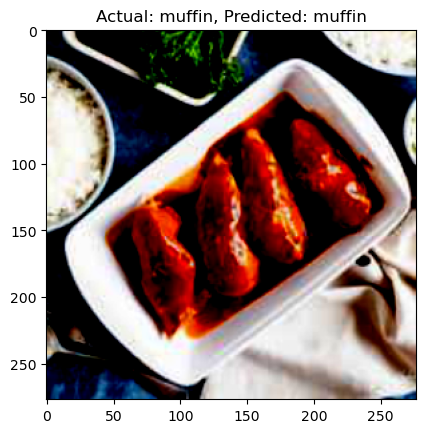

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


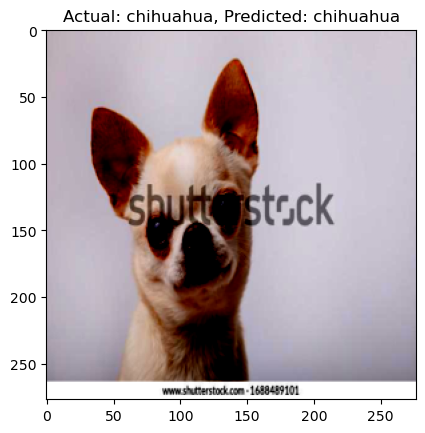

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


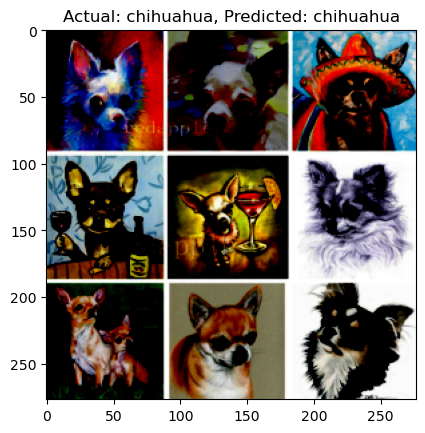

In [12]:
import random
import matplotlib.pyplot as plt

# 모델을 평가 모드로 설정
model.eval()

# 테스트 데이터셋에서 무작위 이미지 선택
random_image_idx = random.sample(range(len(test_data)),3)
for idx in random_image_idx:
    image, label = test_data[idx]

# 순방향전파를 실행하여 예측 획득
    with torch.no_grad():
        image = image.unsqueeze(0).cuda()
        prediction = model(image)

    predicted_class = prediction.argmax().item()

    # 클래스 레이블 목록 정의 (데이터셋에 따라 사용자 정의 가능)
    class_labels =['chihuahua', 'muffin']

    # 이미지와 예측을 표시
    plt.imshow(image.squeeze(0).cpu().permute(1, 2, 0))
    plt.title(f'Actual: {class_labels[label]}, Predicted: {class_labels[predicted_class]}')
    plt.show()

## 기존 학습과 다르게 교체한 부분
1. batch size : 기존 학습에선 batch size가 100이였으나 이번 학습에 사용되었던 VGG16 모델은 층이 깊은 모델로 batch size가 클 시 그래픽 카드의 메모리가 부족하여 batch size를 16으로 설정하였다.
2. image transform : 기존 학습에선 이미지를 transform하는 과정에서 Resize 및 이미지를 Tensor로 변환시키는 Totensor, 두가지만 있었지만 이번 학습에선 traindata에는 50%의 확률로 상하, 좌우 반전을 추가하고, Tensor로 변환 후 Normalize를 진행하고 validation, test data에선 Nomalize만 추가해 주었다.
3. model : pretrained된 VGG16 모델을 가져와 최종 레이어만 수정하여 학습을 진행하였다.
4. validation : validation시 model.eval()을 추가하여 model이 validation data를 학습하지 않도록 수정

## 결과

* 성능 향상
    * 기존 학습시 최종 validation에서의 정확도는 약 91.2%, 이번 학습에서 최종 validation의 정확도는 약 99.22%로 거의 대부분의 이미지를 정확하게 구분해내는 성능 향상을 보여줌